# Функция для приближенного расчета арктангенса

Для небольших $x$:

$$arth x = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \ldots + R(x) =
\sum_{n=0}^N  \frac{(-1)^{n-1}}{(2n-1)}{x^{2n-1}} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [6]:
import math

ITERATIONS = 20

def my_atan(x):
    """
    Вычисление гиперболического арктангенса при помощи частичного суммирования
    ряда Тейлора для окрестности 0
    """
    x_pow = x
    multiplier = 1
    partial_sum = x
    for n in range(1, ITERATIONS):
        x_pow *= x**2 / (2*n - 1)
        multiplier *= -1 / (2*n)
        partial_sum += x_pow * multiplier
    
    return partial_sum

print(help(math.atan), math.atan(0.4))
print(help(my_atan), my_atan(0.4))

Help on built-in function atan in module math:

atan(x, /)
    Return the arc tangent (measured in radians) of x.

None 0.3805063771123649
Help on function my_atan in module __main__:

my_atan(x)
    Вычисление гиперболического арктангенса при помощи частичного суммирования
    ряда Тейлора для окрестности 0

None 0.3684243976011541


Функция умеет считать арктангенс комплексного аргумента.

Стандартная библиотека тоже умеет, **и поточнее**.

In [8]:
import math
import cmath

complex_angle = cmath.atan(5)
print('"Угол", на котором арктангенс достигает пяти:', complex_angle)

print("Достигает ли пяти наш арктангенс?", my_atan(complex_angle))
print("А библиотечный?", cmath.atan(complex_angle))

"Угол", на котором арктангенс достигает пяти: (1.373400766945016+0j)
Достигает ли пяти наш арктангенс? (0.2693460504090744+0j)
А библиотечный? (0.9414463710587447+0j)


А какое и где слабое место у нашего арктангенса?

<function my_atan at 0x0000024113F0B820> <numpy.vectorize object at 0x0000024113FE17F0>


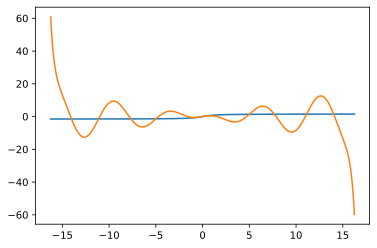

In [10]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(my_atan)
print(my_atan, vs)

angles = np.r_[-16.25:16.25:0.01]
plt.plot(angles, np.arctan(angles))
plt.plot(angles, vs(angles))
plt.show()